In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
metadata <- read_tsv("../../analysis/kaggle/combined_metadata.tsv.xz", guess_max = 200000)

Parsed with column specification:
cols(
  .default = col_character(),
  `Patient ID` = col_double(),
  `Patient's Birth Date` = col_double(),
  `Patient's Address` = col_logical(),
  `Patient's Telephone Numbers` = col_logical(),
  `Slice Thickness` = col_double(),
  `Repetition Time` = col_double(),
  `Echo Time` = col_double(),
  `Number of Averages` = col_double(),
  `Imaging Frequency` = col_double(),
  `Echo Number(s)` = col_double(),
  `Magnetic Field Strength` = col_double(),
  `Number of Phase Encoding Steps` = col_double(),
  `Echo Train Length` = col_double(),
  `Percent Sampling` = col_double(),
  `Percent Phase Field of View` = col_double(),
  `Pixel Bandwidth` = col_double(),
  `Trigger Time` = col_double(),
  `Nominal Interval` = col_double(),
  `Cardiac Number of Images` = col_double(),
  `Flip Angle` = col_double()
  # ... with 30 more columns
)
See spec(...) for full column specifications.


In [3]:
patient_metadata <- read_tsv("../../analysis/kaggle/patient_metadata.tsv")

Parsed with column specification:
cols(
  .default = col_double(),
  PatientsAgeNum = col_character(),
  PatientsAgeUnit = col_character(),
  PatientsSex = col_character(),
  pid = col_character(),
  used = col_logical(),
  set = col_character(),
  PhaseEncodingDirection = col_character(),
  ModelName = col_character(),
  PixelSpacing = col_character(),
  ScanningSequence = col_character(),
  SequenceName = col_character(),
  SequenceVariant = col_character(),
  SoftwareVersion = col_character(),
  inconsistentMetadata = col_logical()
)
See spec(...) for full column specifications.


## Explore the available metadata

In [4]:
metadata %>% colnames

[1] "Specific Character Set"                  
 [2] "Image Type"                              
 [3] "Instance Creation Time"                  
 [4] "SOP Class UID"                           
 [5] "SOP Instance UID"                        
 [6] "Study Time"                              
 [7] "Series Time"                             
 [8] "Acquisition Time"                        
 [9] "Modality"                                
[10] "Manufacturer"                            
[11] "Series Description"                      
[12] "Manufacturer's Model Name"               
[13] "Referenced Image Sequence"               
[14] "Patient's Name"                          
[15] "Patient ID"                              
[16] "Patient's Birth Date"                    
[17] "Patient's Sex"                           
[18] "Patient's Age"                           
[19] "Patient's Address"                       
[20] "Patient's Telephone Numbers"             
[21] "Body Part Examined"                      
[22] "Scanning Sequence"                       
[23] "Sequence Variant"                        
[24] "Scan Options"                            
[25] "MR Acquisition Type"                     
[26] "Sequence Name"                           
[27] "Angio Flag"                              
[28] "Slice Thickness"                         
[29] "Repetition Time"                         
[30] "Echo Time"                               
[31] "Number of Averages"                      
[32] "Imaging Frequency"                       
[33] "Imaged Nucleus"                          
[34] "Echo Number(s)"                          
[35] "Magnetic Field Strength"                 
[36] "Number of Phase Encoding Steps"          
[37] "Echo Train Length"                       
[38] "Percent Sampling"                        
[39] "Percent Phase Field of View"             
[40] "Pixel Bandwidth"                         
[41] "Software Versions"                       
[42] "Trigger Time"                            
[43] "Nominal Interval"                        
[44] "Cardiac Number of Images"                
[45] "Transmit Coil Name"                      
[46] "Acquisition Matrix"                      
[47] "In-plane Phase Encoding Direction"       
[48] "Flip Angle"                              
[49] "Variable Flip Angle Flag"                
[50] "SAR"                                     
[51] "dB/dt"                                   
[52] "Patient Position"                        
[53] "Series Number"                           
[54] "Acquisition Number"                      
[55] "Instance Number"                         
[56] "Image Position (Patient)"                
[57] "Image Orientation (Patient)"             
[58] "Position Reference Indicator"            
[59] "Slice Location"                          
[60] "Samples per Pixel"                       
[61] "Photometric Interpretation"              
[62] "Rows"                                    
[63] "Columns"                                 
[64] "Pixel Spacing"                           
[65] "Bits Allocated"                          
[66] "Bits Stored"                             
[67] "High Bit"                                
[68] "Pixel Representation"                    
[69] "Smallest Image Pixel Value"              
[70] "Largest Image Pixel Value"               
[71] "Window Center"                           
[72] "Window Width"                            
[73] "Window Center & Width Explanation"       
[74] "Performed Procedure Step Start Time"     
[75] "Performed Procedure Step ID"             
[76] "Comments on the Performed Procedure Step"
[77] "file"                                    
[78] "dir"                                     
[79] "Id"                                      
[80] "Referenced Study Sequence"               
[81] "Referenced Patient Sequence"             
[82] "Spacing Between Slices"                  
[83] "Number of Frames"                        
[84] "Contrast/Bo

In [5]:
metadata %>% count(`Manufacturer`,`Manufacturer's Model Name`, `Magnetic Field Strength`)

Manufacturer,Manufacturer's Model Name,Magnetic Field Strength,n
SIEMENS,Aera,1.5,333810
SIEMENS,Skyra,3.0,39453


In [6]:
metadata %>% count(used)

used,n
FALSE,15503
TRUE,357760


Different kind of inconsistencies mostly on sequence name, dimension, flip angel, etc. Some of these are fixed in the conversion process others are ignored

In [7]:
patient_metadata %>% count(inconsistentMetadata)

inconsistentMetadata,n
FALSE,1116
TRUE,33


## Inspect slice spacings

These inconsistencies have mostly been fixed in the conversion from dicom to nifti but still show up in the metadata

In [8]:
# https://stackoverflow.com/a/8189441
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

In [9]:
spacing <- metadata %>%
    filter(used) %>%
    select(PatientID=pid, SliceLocation=`Slice Location`) %>%
    unique %>%
    group_by(PatientID) %>%
    arrange(SliceLocation) %>%
    mutate(
        dist = SliceLocation-lag(SliceLocation),
        meddist = Mode(round(dist,digits = 1)),
        dev=abs(dist-meddist)>1,
        any_dev=any(dev,na.rm = T)
    ) %>%
    arrange(PatientID)
inconsistent_spacing <- spacing %>%
    filter(any_dev)

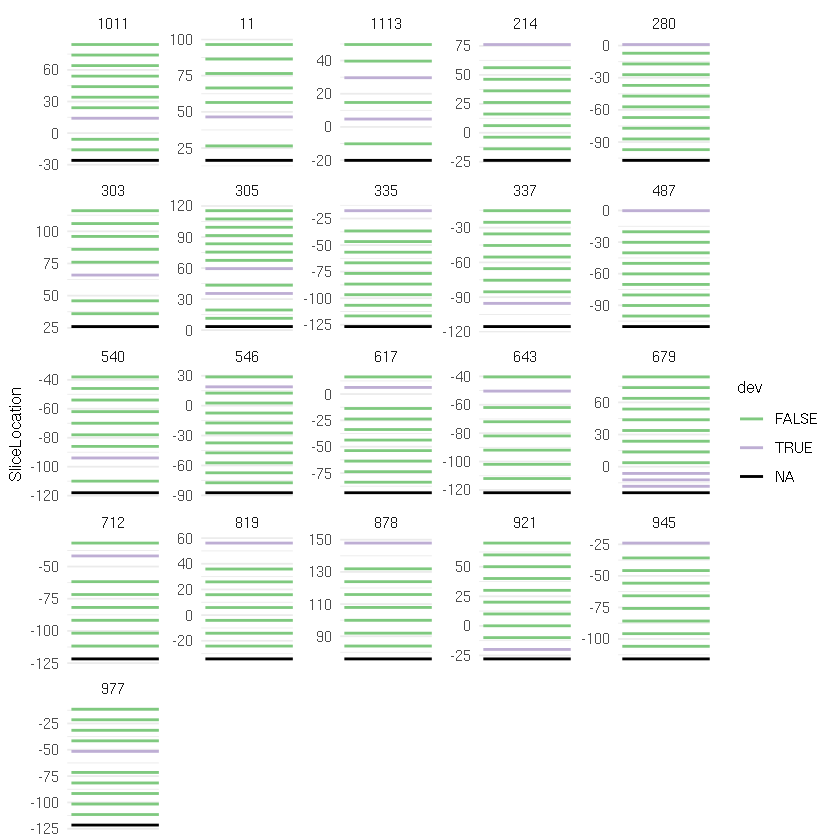

In [10]:
# inserted slices are not shown properly as they inherit the original slicelocation from the dicom metadata (but they are fixed in the nifti)
inconsistent_spacing %>%
    ggplot(aes(y=SliceLocation,yend=SliceLocation,color=dev)) +
    geom_segment(x=0,xend=10,lwd=.8) +
    facet_wrap(. ~ PatientID, scales="free") +
    theme_minimal() +
    scale_color_brewer(type="qual",na.value="black")

## Age distribution

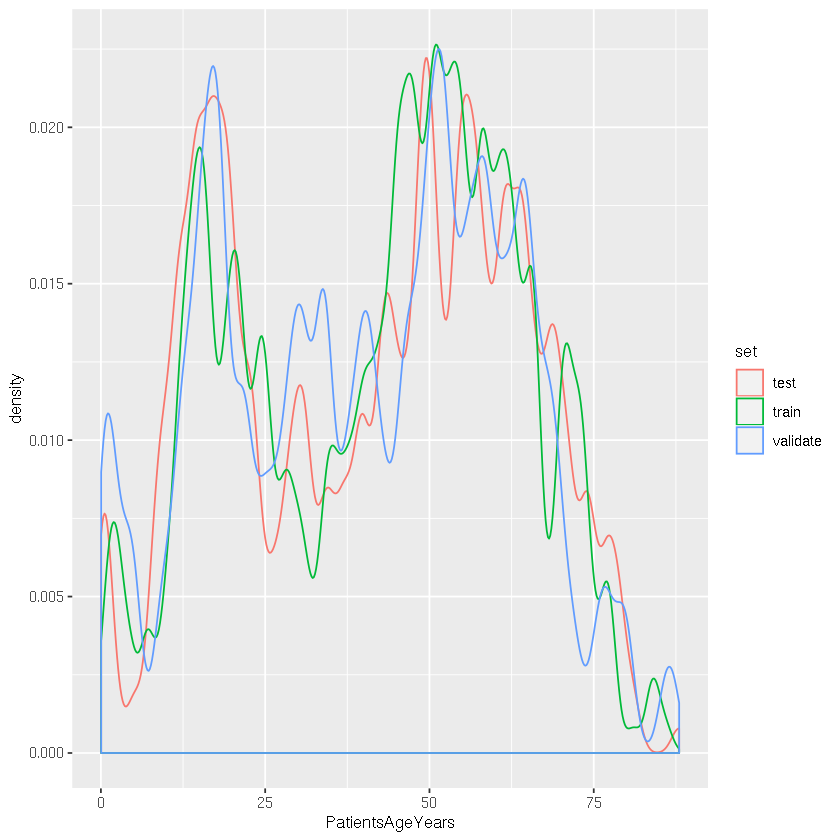

In [11]:
patient_metadata %>% ggplot(aes(PatientsAgeYears,color=set)) + geom_density(adjust=.2)

## Kaggle Metadata Summary

Count patients with split datasets (_a and _b) only once

In [12]:
uniq_pat_meta <- patient_metadata %>%
    filter(!str_detect(pid,"_b"))

In [13]:
uniq_pat_meta %>% count(PatientsSex)

PatientsSex,n
F,470
M,670


In [14]:
uniq_pat_meta %>%
    mutate(AgeBin=cut(PatientsAgeYears, breaks=c(-Inf,17,30,50,Inf))) %>%
    select(PatientID,contains("Age")) %>%
    count(AgeBin)

AgeBin,n
"(-Inf,17]",202
"(17,30]",173
"(30,50]",298
"(50, Inf]",467


In [15]:
uniq_pat_meta %>% summarize(
    minAge = min(PatientsAgeYears),
    maxAge = max(PatientsAgeYears),
    #minHeight = max(PatientsHeight),
)

minAge,maxAge
0.03846154,88


In [16]:
uniq_pat_meta %>% count(MagneticFieldStrength)

MagneticFieldStrength,n
1.5,1025
3.0,115


In [17]:
uniq_pat_meta %>%
    mutate(
        smallerDim = pmin(Columns, Rows),
        largerDim = pmax(Columns, Rows),
    ) %>%
    summarize(
        min(EchoTime),
        max(EchoTime),
        min(RepetitionTime),
        max(RepetitionTime),
        min(PixelBandwidth),
        max(PixelBandwidth),
        min(SliceThickness),
        max(SliceThickness),
        min(PixelSpacing),
        max(PixelSpacing),
        min(NumberOfPhaseEncodingSteps),
        max(NumberOfPhaseEncodingSteps),
        min(smallerDim),
        max(smallerDim),
        min(largerDim),
        max(largerDim),
    ) %>% t

min(EchoTime),1.04
max(EchoTime),1.54
min(RepetitionTime),14
max(RepetitionTime),54.72
min(PixelBandwidth),915
max(PixelBandwidth),1235
min(SliceThickness),5
max(SliceThickness),8
min(PixelSpacing),"[0.58928573131561, 0.58928573131561]"
max(PixelSpacing),"[1.953125, 1.953125]"
min(NumberOfPhaseEncodingSteps),112
